<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/lab01_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings(
    "ignore",
    message="l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)",
    category=UserWarning,
    module=r"sklearn\.linear_model\._logistic"
)

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-04-19 14:38:57--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.008s  

2025-04-19 14:38:57 (7.02 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [4]:
pd.read_csv('car_data.csv',delimiter=',',header=None).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,416,89,44,70,158,64,6,141,47,18,143,164,299,173,66,9,11,193,199
1,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197
2,64,93,45,86,201,69,7,184,35,22,145,203,523,183,72,0,4,194,197
3,78,104,52,94,208,66,5,208,31,24,161,227,666,218,76,11,4,193,191
4,217,104,57,103,216,69,11,219,30,25,176,228,708,219,73,4,3,186,196
5,412,80,43,71,133,60,7,150,45,19,146,170,330,176,81,6,15,180,184
6,209,101,56,100,168,55,11,214,31,24,175,219,681,224,74,2,3,185,192
7,174,93,48,84,150,63,11,156,44,20,165,171,354,188,73,8,15,185,195
8,830,97,37,70,173,66,7,151,43,19,129,167,346,119,65,0,16,201,208
9,429,84,37,70,145,62,9,136,48,18,134,159,280,140,68,11,9,194,202


In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.236794,93.522769,44.774135,81.703097,169.351548,62.045537,8.717668,168.300546,41.003643,20.528233,147.766849,188.357013,436.375228,174.371585,72.797814,6.375228,12.393443,188.848816,195.493625
std,243.571065,8.194150,6.037896,15.720100,34.800819,8.667190,5.093512,32.200711,7.686844,2.494085,14.286444,30.896520,170.622618,31.513240,7.956377,4.935848,8.791276,6.180150,7.389975
min,4.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,219.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,148.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,413.000000,92.000000,44.000000,80.000000,166.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,643.000000,99.000000,49.000000,96.000000,197.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,217.000000,583.000000,196.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,110.000000,333.000000,138.000000,52.000000,260.000000,59.000000,28.000000,188.000000,320.000000,982.000000,262.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

# Ans

1.   Logistic Regression performs best on normalized values so we will normalize our training set values and test values
2.   PCA is also senstive to feature scales



In [8]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[:,:])
X_test = scaler.transform(X_test[:,:])


1.   Checking for Nan Values


In [9]:
np.isnan(X_train).sum(),np.isnan(X_test).sum()

(np.int64(0), np.int64(0))


1.   Converting string classes in target to numerical catergories for Sklearn




In [10]:
from sklearn.preprocessing import LabelEncoder
def convert(y):
  encoder = LabelEncoder()
  encoded_y = encoder.fit_transform(y)
  return encoded_y

In [11]:
pd.DataFrame(y_train).stack().unique()

array(['bus', 'opel', 'van', 'saab'], dtype=object)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [12]:
### YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [13]:
lr = LogisticRegression(multi_class='multinomial',solver='saga',tol=1e-3,max_iter=600,l1_ratio = 0)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats=3,random_state=36851234)
parameters = {'penalty':['l1', 'l2','elasticnet','none'], 'C':[1e-2,1e-1,1,10,100]}
grid = GridSearchCV(lr,parameters,scoring='accuracy',cv=cv)

In [14]:
y_train_num = convert(y_train)
y_test_num = convert(y_test)

In [15]:
training = grid.fit(X_train,y_train_num)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default va

In [16]:
print(f"Score = {training.best_score_}")
print(f'Hyperparameters = {training.best_params_}')
y_pred = grid.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_pred=y_pred,y_true = y_test_num)}")
print(f"F1 Score. = {f1_score(y_pred=y_pred,y_true=y_test_num,average=None)}")

Score = 0.7935016835016834
Hyperparameters = {'C': 100, 'penalty': 'l1'}
Accuracy Score = 0.7878787878787878
F1 Score. = [0.92198582 0.60927152 0.67484663 0.97841727]


In [17]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

In [18]:
from sklearn.metrics import roc_curve,auc

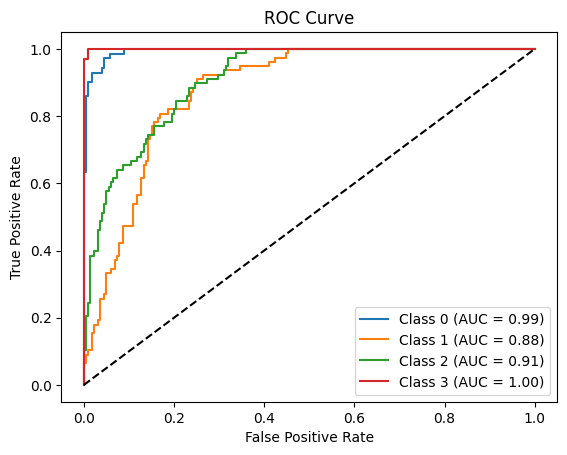

In [19]:
y_probas = grid.predict_proba(X_test)
n_classes = y_probas.shape[1]
for i in range(n_classes):
  fpr,tpr,_ = roc_curve(y_test_num == i,y_probas[:, i])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

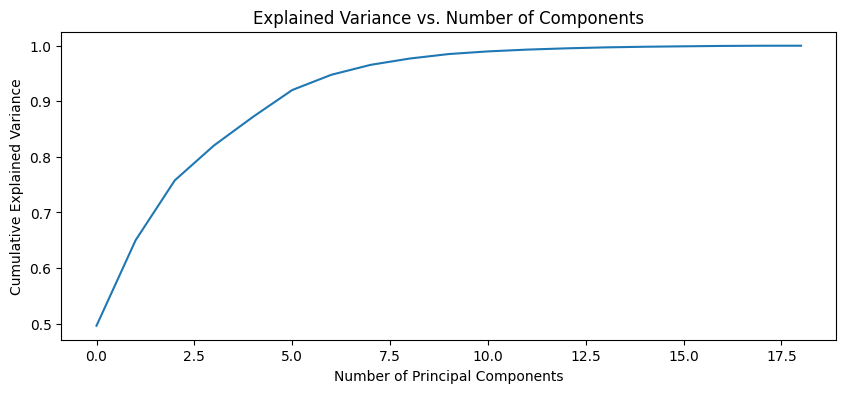

In [20]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

# Ans:
The appropriate number of components chosen would be 10 because the curve flattens out after 10 so we can reduce our dataset to 5 dimensions and still retain 95% of its information


# Normalization
Normalizing the data is really imporatant for PCA as it is sensitive to feature scales

In [21]:
### YOUR CODE HERE
appropriate_pca = PCA(n_components=5)
X_train_pca = appropriate_pca.fit_transform(X_train)
X_test_pca = appropriate_pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [22]:
### YOUR CODE HERE
training_pca = grid.fit(X_train_pca,y_train_num)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/line

In [23]:
print(f"Score = {training_pca.best_score_}")
print(f'Hyperparameters = {training_pca.best_params_}')
y_pred = grid.predict(X_test_pca)
print(f"Accuracy Score = {accuracy_score(y_pred=y_pred,y_true = y_test_num)}")
print(f"F1 Score. = {f1_score(y_pred=y_pred,y_true=y_test_num,average=None)}")

Score = 0.445679012345679
Hyperparameters = {'C': 0.01, 'penalty': 'l2'}
Accuracy Score = 0.44107744107744107
F1 Score. = [0.46357616 0.28358209 0.41509434 0.58666667]


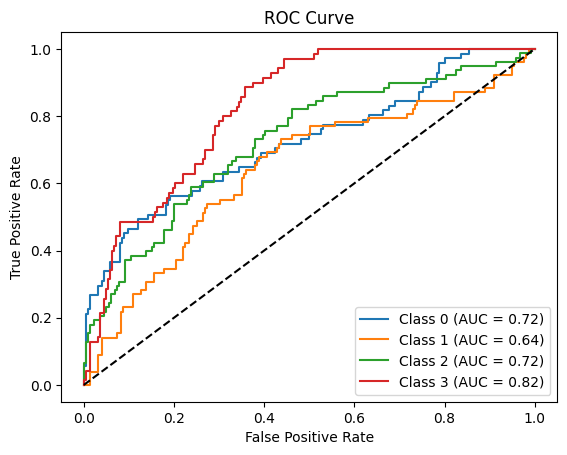

In [24]:
y_probas = grid.predict_proba(X_test_pca)
n_classes = y_probas.shape[1]
for i in range(n_classes):
  fpr,tpr,_ = roc_curve(y_test_num == i,y_probas[:, i])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [26]:
results = []

for i in range(1,15):
  dt = DecisionTreeClassifier(max_depth=i)
  cv = cross_val_score(estimator=dt,X=X_train_pca,y=y_train_num,cv=5,scoring='accuracy')
  s = dt.fit(X_train_pca,y_train_num).score(X_train_pca,y_train_num)
  results.append({
      'max_depth':i,
      'cv_score':cv,
      'cv_mean': cv.mean(),
      'cv_std':cv.std(),
      'score':s
  })

  depths = [r['max_depth'] for r in results]
  cv_means = [r['cv_mean'] for r in results]
  cv_stds = [r['cv_std'] for r in results]
  train_scores = [r['score'] for r in results]

  depths = np.array(depths)
  cv_means = np.array(cv_means)
  cv_stds = np.array(cv_stds)
  train_scores = np.array(train_scores)

<ipython-input-27-96a9c48166a3>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


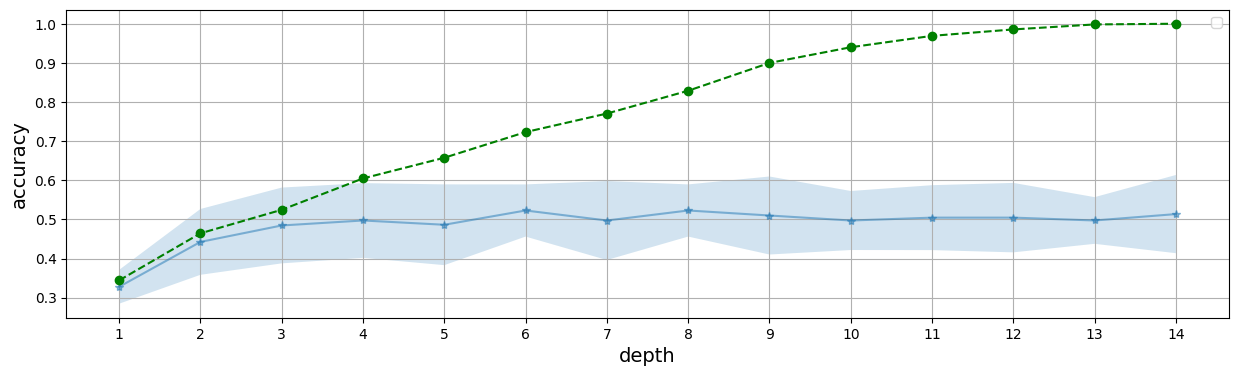

In [27]:
plt.figure(figsize=(15,4))
plt.plot(depths,cv_means,'-*',alpha=0.5)
plt.fill_between(depths, cv_means - 2*cv_stds, cv_means + 2*cv_stds, alpha=0.2)
plt.plot(depths, train_scores,'go--')
plt.xlabel('depth', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
m = cv_means.argmax()
good_depth = range(1,15)[m]
good_cv_score = cv_means[m]
good_cv_std = cv_stds[m]
print(f"Optimal Tree Deepth = {good_depth} achieves accuracy = {good_cv_score * 100}%")

Optimal Tree Deepth = 6 achieves accuracy = 52.280233527939956%


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [29]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score,accuracy_score
from tqdm import tqdm

In [30]:
n_estimators = np.arange(2,101,5)
logreg_scores = {'accuracy':[],'f1':[]}
decision_tree_scores = {'accuracy':[],'f1':[]}

best_log_reg_params = training.best_params_
best_decision_treee_params = good_depth

logreg_base = LogisticRegression(**{**best_log_reg_params, 'solver': 'saga'}, random_state=42)
decision_tree_base = DecisionTreeClassifier(max_depth=best_decision_treee_params,random_state=42)

for n in tqdm(n_estimators):
  bagging = BaggingClassifier(
      estimator=logreg_base,
      n_estimators=n,
      random_state=42
      )
  bagging.fit(X_train_pca,y_train_num)
  y_pred = bagging.predict(X_test_pca)
  logreg_scores['accuracy'].append(accuracy_score(y_pred=y_pred,y_true=y_test_num))
  logreg_scores['f1'].append(f1_score(y_pred=y_pred,y_true=y_test_num,average='weighted'))

for n in tqdm(n_estimators):
  bagging = BaggingClassifier(
      estimator = decision_tree_base,
      n_estimators = n,
      random_state=42
  )
  bagging.fit(X_train_pca,y_train_num)
  y_pred = bagging.predict(X_test_pca)
  decision_tree_scores['accuracy'].append(accuracy_score(y_pred=y_pred,y_true=y_test_num))
  decision_tree_scores['f1'].append(f1_score(y_test_num,y_pred,average='weighted'))



 25%|██▌       | 5/20 [00:02<00:07,  2.10it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 30%|███       | 6/20 [00:02<00:07,  1.92it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-pa

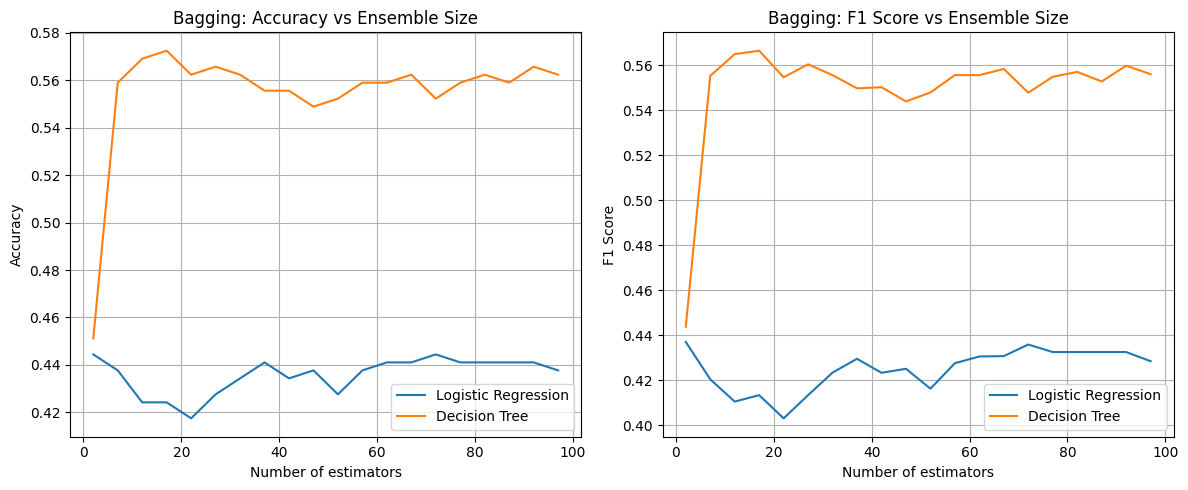

In [38]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(n_estimators, logreg_scores['accuracy'], label='Logistic Regression')
plt.plot(n_estimators, decision_tree_scores['accuracy'], label='Decision Tree')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Bagging: Accuracy vs Ensemble Size')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_estimators, logreg_scores['f1'], label='Logistic Regression')
plt.plot(n_estimators, decision_tree_scores['f1'], label='Decision Tree')
plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')
plt.title('Bagging: F1 Score vs Ensemble Size')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_estimators = np.arange(2, 101, 5)
logreg_scores = {'accuracy': [], 'f1': [], 'cv_accuracy': [], 'cv_f1': []}
decision_tree_scores = {'accuracy': [], 'f1': [], 'cv_accuracy': [], 'cv_f1': []}

best_log_reg_params = training.best_params_
best_decision_tree_params = good_depth

logreg_base = LogisticRegression(**{**best_log_reg_params, 'solver': 'saga'}, random_state=42)
decision_tree_base = DecisionTreeClassifier(max_depth=best_decision_tree_params, random_state=42)

for n in tqdm(n_estimators, desc="Logistic Regression Bagging"):
    bagging = BaggingClassifier(
        estimator=logreg_base,
        n_estimators=n,
        random_state=42
    )

    cv_acc = cross_val_score(bagging, X_train_pca, y_train_num, cv=skf, scoring='accuracy', n_jobs=-1)
    cv_f1 = cross_val_score(bagging, X_train_pca, y_train_num, cv=skf, scoring='f1_weighted', n_jobs=-1)

    logreg_scores['cv_accuracy'].append(cv_acc.mean())
    logreg_scores['cv_f1'].append(cv_f1.mean())


    bagging.fit(X_train_pca, y_train_num)
    y_pred = bagging.predict(X_test_pca)
    logreg_scores['accuracy'].append(accuracy_score(y_test_num, y_pred))
    logreg_scores['f1'].append(f1_score(y_test_num, y_pred, average='weighted'))

for n in tqdm(n_estimators, desc="Decision Tree Bagging"):
    bagging = BaggingClassifier(
        estimator=decision_tree_base,
        n_estimators=n,
        random_state=42
    )
    cv_acc = cross_val_score(bagging, X_train_pca, y_train_num, cv=skf, scoring='accuracy', n_jobs=-1)
    cv_f1 = cross_val_score(bagging, X_train_pca, y_train_num, cv=skf, scoring='f1_weighted', n_jobs=-1)
    decision_tree_scores['cv_accuracy'].append(cv_acc.mean())
    decision_tree_scores['cv_f1'].append(cv_f1.mean())
    bagging.fit(X_train_pca, y_train_num)
    y_pred = bagging.predict(X_test_pca)
    decision_tree_scores['accuracy'].append(accuracy_score(y_test_num, y_pred))
    decision_tree_scores['f1'].append(f1_score(y_test_num, y_pred, average='weighted'))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

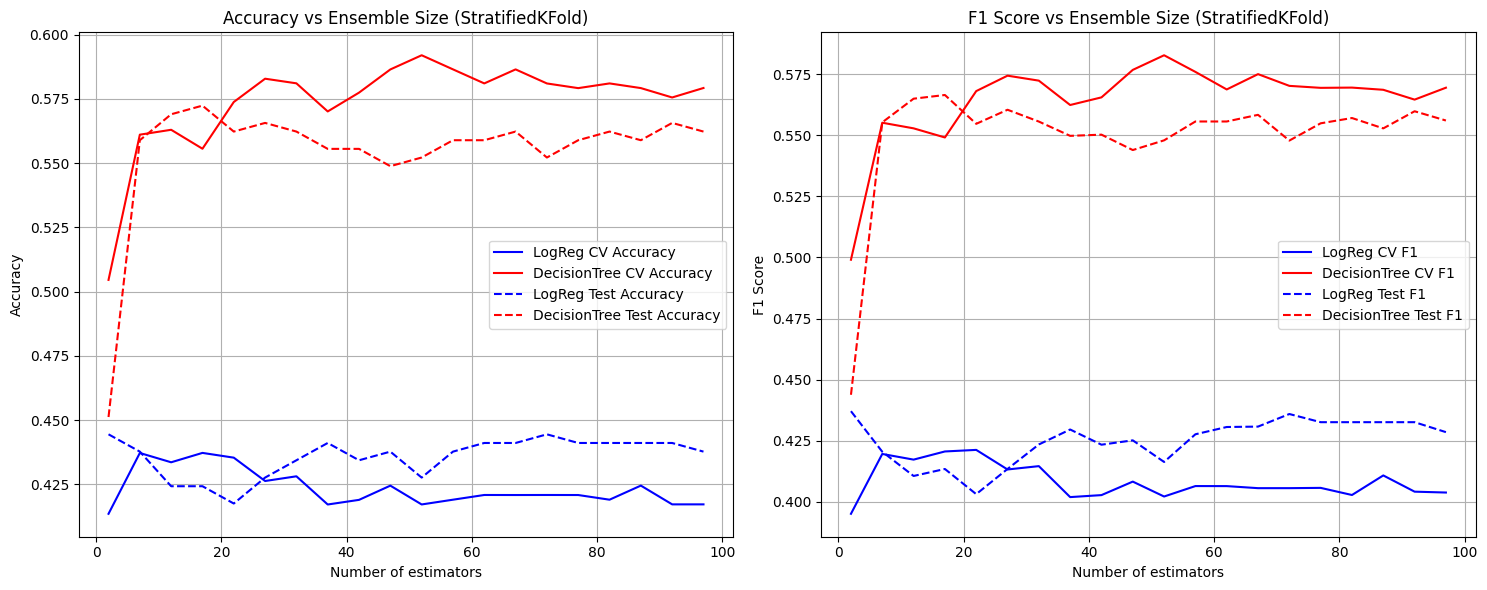

In [44]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators, logreg_scores['cv_accuracy'], 'b-', label='LogReg CV Accuracy')
plt.plot(n_estimators, decision_tree_scores['cv_accuracy'], 'r-', label='DecisionTree CV Accuracy')
plt.plot(n_estimators, logreg_scores['accuracy'], 'b--', label='LogReg Test Accuracy')
plt.plot(n_estimators, decision_tree_scores['accuracy'], 'r--', label='DecisionTree Test Accuracy')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Ensemble Size (StratifiedKFold)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_estimators, logreg_scores['cv_f1'], 'b-', label='LogReg CV F1')
plt.plot(n_estimators, decision_tree_scores['cv_f1'], 'r-', label='DecisionTree CV F1')
plt.plot(n_estimators, logreg_scores['f1'], 'b--', label='LogReg Test F1')
plt.plot(n_estimators, decision_tree_scores['f1'], 'r--', label='DecisionTree Test F1')
plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Ensemble Size (StratifiedKFold)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [45]:
optimal_logreg = n_estimators[np.argmax(logreg_scores['cv_accuracy'])]
optimal_tree = n_estimators[np.argmax(decision_tree_scores['cv_accuracy'])]

print(f"\nOptimal number of Logistic Regression estimators: {optimal_logreg}")
print(f"Optimal number of Decision Tree estimators: {optimal_tree}")
print(f"Max CV Accuracy (LogReg): {max(logreg_scores['cv_accuracy']):.4f}")
print(f"Max CV Accuracy (Tree): {max(decision_tree_scores['cv_accuracy']):.4f}")


Optimal number of Logistic Regression estimators: 17
Optimal number of Decision Tree estimators: 52
Max CV Accuracy (LogReg): 0.4372
Max CV Accuracy (Tree): 0.5920


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# YOUR CODE HERE
n_trees = np.arange(1, 101)
rf_scores = {'accuracy': [], 'f1': []}
skf = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

for n in tqdm(n_trees):
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=good_depth,
        random_state=42
    )

    cv_accuracy = cross_val_score(rf, X_train_pca, y_train_num,
                                cv=skf, scoring='accuracy', n_jobs=-1)
    cv_f1 = cross_val_score(rf, X_train_pca, y_train_num,
                          cv=skf, scoring='f1_weighted', n_jobs=-1)

    rf_scores['accuracy'].append(cv_accuracy.mean())
    rf_scores['f1'].append(cv_f1.mean())


100%|██████████| 100/100 [22:30<00:00, 13.50s/it]


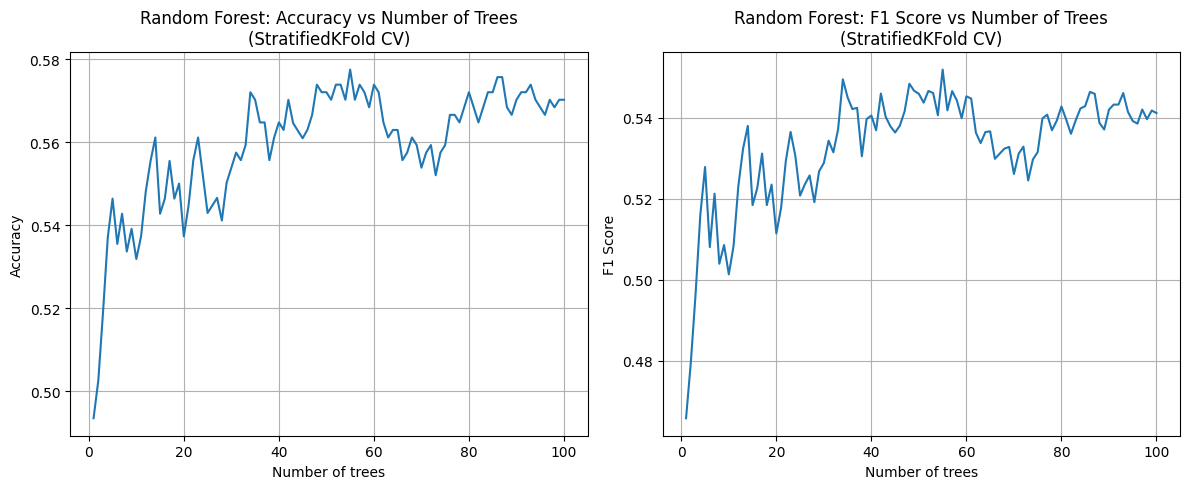

In [55]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_trees, rf_scores['accuracy'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Number of Trees\n(StratifiedKFold CV)')
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(n_trees, rf_scores['f1'])
plt.xlabel('Number of trees')
plt.ylabel('F1 Score')
plt.title('Random Forest: F1 Score vs Number of Trees\n(StratifiedKFold CV)')
plt.grid()

plt.tight_layout()
plt.show()


In [56]:
optimal_n_trees = n_trees[np.argmax(rf_scores['accuracy'])]
final_rf = RandomForestClassifier(
    n_estimators=optimal_n_trees,
    max_depth=good_depth,
    random_state=42
).fit(X_train_pca, y_train_num)

y_pred = final_rf.predict(X_test_pca)
print(f"Optimal number of Random Forest estimators: {optimal_n_trees}")
print(f"Test Accuracy: {accuracy_score(y_test_num, y_pred):.4f}")
print(f"Test F1 Score: {f1_score(y_test_num, y_pred, average='weighted'):.4f}")

Optimal number of Random Forest estimators: 55
Test Accuracy: 0.5657
Test F1 Score: 0.5582


# Ans
The optimal Number of Trees for Random I have got is 55 which is slighlty greater than decision trees optimial number which is 52.

1.   Random Forest requires slightly more (55) because its additional feature randomness creates weaker individual trees
2.   Decision Trees benefit more from bagging (52) due to higher variance



#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [66]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve


models = {
    "Logistic Regression": LogisticRegression(**{**training.best_params_, 'solver': 'saga'},
                           random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=good_depth, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=55, max_depth=good_depth,
                         random_state=42)
}

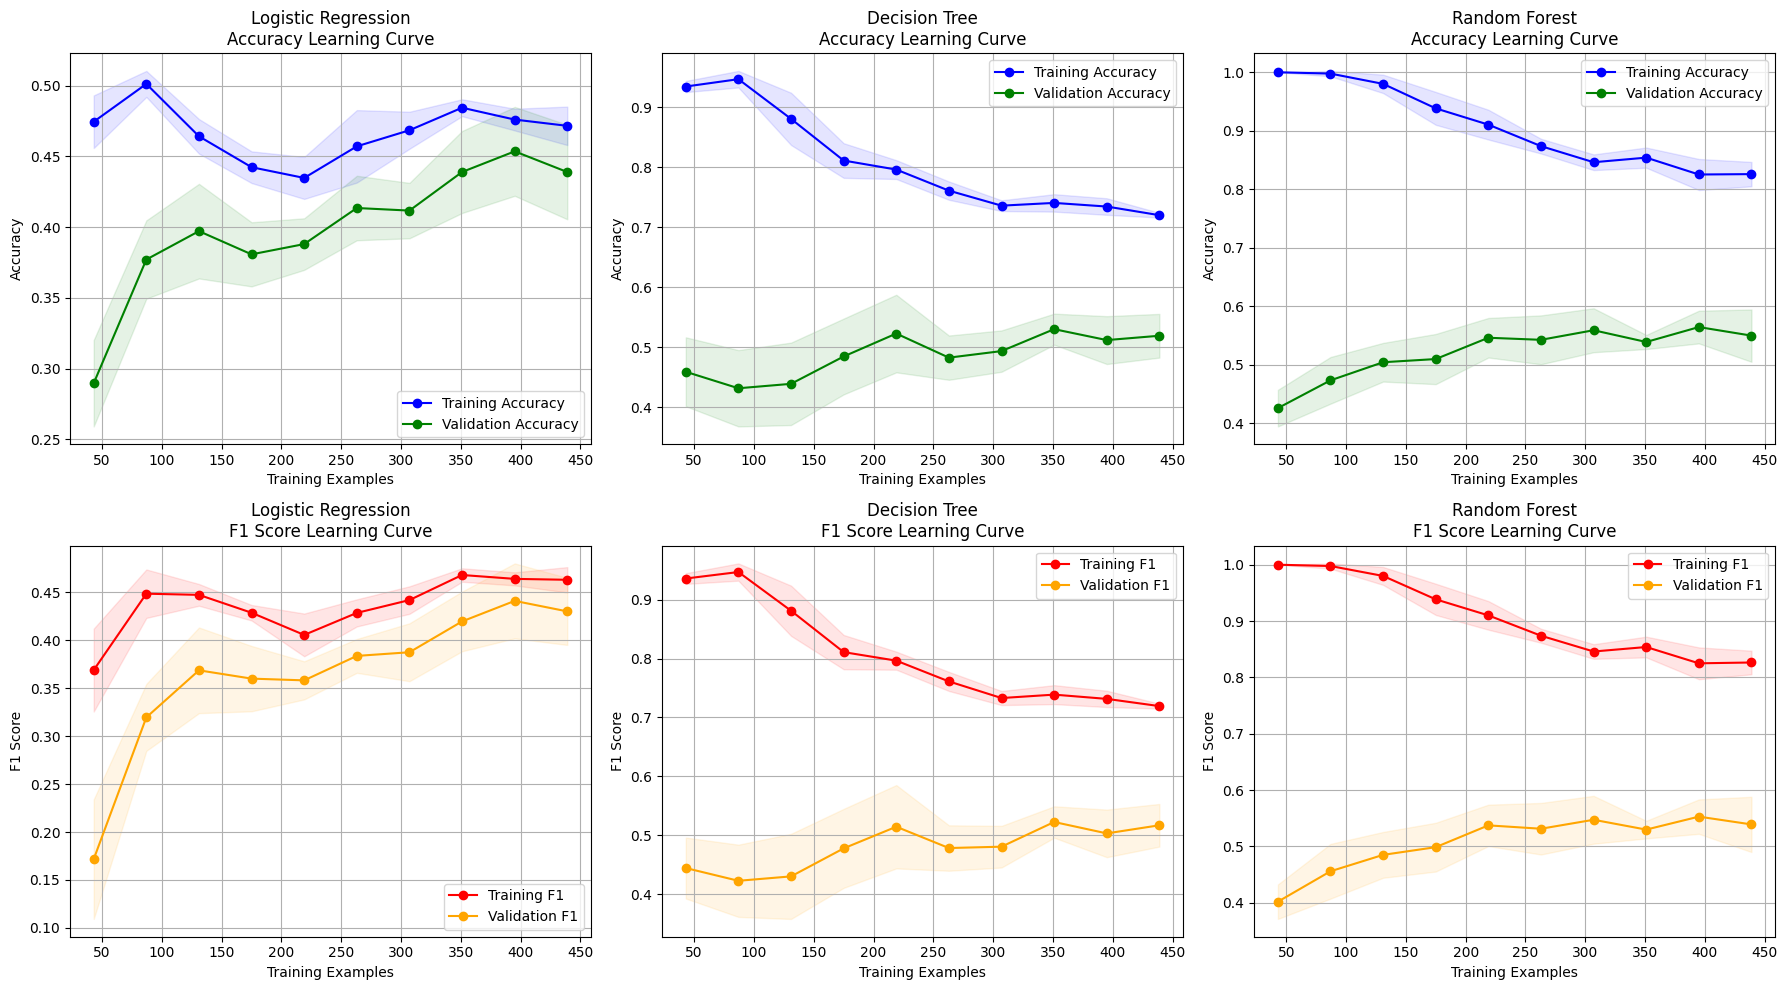

In [71]:
plt.figure(figsize=(18, 10))
for i, (name, model) in enumerate(models.items()):

    train_sizes, train_acc, test_acc = learning_curve(
        model, X_train_pca, y_train_num, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy', n_jobs=-1
    )


    _, train_f1, test_f1 = learning_curve(
        model, X_train_pca, y_train_num, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted', n_jobs=-1
    )

    plt.subplot(2, 3, i+1)
    plt.plot(train_sizes, np.mean(train_acc, axis=1), 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, np.mean(test_acc, axis=1), 'o-', color='green', label='Validation Accuracy')
    plt.fill_between(train_sizes,
                    np.mean(train_acc, axis=1) - np.std(train_acc, axis=1),
                    np.mean(train_acc, axis=1) + np.std(train_acc, axis=1),
                    alpha=0.1, color='blue')
    plt.fill_between(train_sizes,
                    np.mean(test_acc, axis=1) - np.std(test_acc, axis=1),
                    np.mean(test_acc, axis=1) + np.std(test_acc, axis=1),
                    alpha=0.1, color='green')
    plt.title(f'{name}\nAccuracy Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='best')

    plt.subplot(2, 3, i+4)
    plt.plot(train_sizes, np.mean(train_f1, axis=1), 'o-', color='red', label='Training F1')
    plt.plot(train_sizes, np.mean(test_f1, axis=1), 'o-', color='orange', label='Validation F1')
    plt.fill_between(train_sizes,
                    np.mean(train_f1, axis=1) - np.std(train_f1, axis=1),
                    np.mean(train_f1, axis=1) + np.std(train_f1, axis=1),
                    alpha=0.1, color='red')
    plt.fill_between(train_sizes,
                    np.mean(test_f1, axis=1) - np.std(test_f1, axis=1),
                    np.mean(test_f1, axis=1) + np.std(test_f1, axis=1),
                    alpha=0.1, color='orange')
    plt.title(f'{name}\nF1 Score Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.grid()
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Ans
We can clearly see from each of the plots that validation accuracy and f1 score for all three models improve for as training examples increase to some point.But after some training examples the f1 score and accuracy have slight chnages concluding that only observations to a extent is useful for our models.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [72]:
!pip install xgboost

In [84]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [85]:
dtrain = xgb.DMatrix(X_train_pca, label=y_train_num)
dtest = xgb.DMatrix(X_test_pca, label=y_test_num)

In [98]:
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': ['mlogloss', 'merror'],
    'random_state': 42
}

n_estimators_range = np.arange(10, 201, 10)
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

acc_results = []
f1_results = []
best_score = 0
best_params = {}

In [99]:

for lr in tqdm(learning_rates, desc="Learning rates"):
    for md in max_depths:
        cv_results = xgb.cv(
            params={**params, 'learning_rate': lr, 'max_depth': md},
            dtrain=dtrain,
            num_boost_round=200,
            nfold=5,
            stratified=True,
            early_stopping_rounds=20,
            verbose_eval=False
        )


        error_column = next((col for col in cv_results.columns if 'merror-mean' in col), None)

        if error_column:

            best_iteration = cv_results[error_column].argmin() + 1
            best_accuracy = 1 - cv_results[error_column].min()

            if best_accuracy > best_score:
                best_score = best_accuracy
                best_params = {
                    'learning_rate': lr,
                    'max_depth': md,
                    'n_estimators': best_iteration
                }
            acc_results.append({
                'learning_rate': lr,
                'max_depth': md,
                'best_iteration': best_iteration,
                'accuracy': best_accuracy
            })


Learning rates: 100%|██████████| 4/4 [00:12<00:00,  3.24s/it]


In [100]:
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': np.int64(11)}
Best cross-validation accuracy: 0.9750


In [101]:
final_model = xgb.train(
    {**params, 'learning_rate': best_params['learning_rate'], 'max_depth': best_params['max_depth']},
    dtrain,
    num_boost_round=best_params['n_estimators']
)

In [102]:
y_pred = final_model.predict(dtest).astype(int)
test_accuracy = accuracy_score(y_test_num, y_pred)
test_f1 = f1_score(y_test_num, y_pred, average='weighted')

In [104]:
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test F1 score: {test_f1:.4f}")

Test accuracy: 0.5556
Test F1 score: 0.5529


<Figure size 1000x600 with 0 Axes>

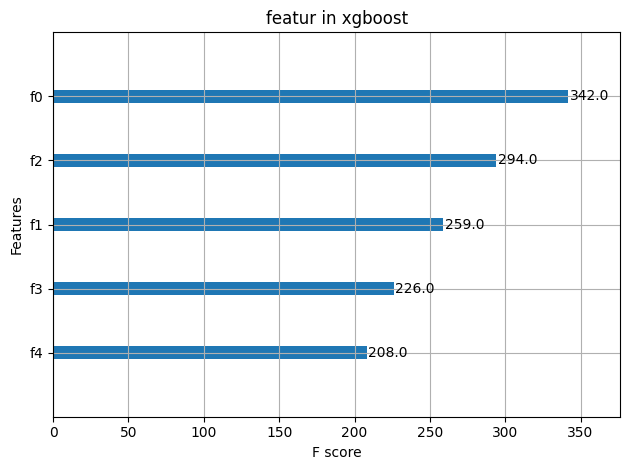

In [106]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model)
plt.title('featur in xgboost')
plt.tight_layout()
plt.show()

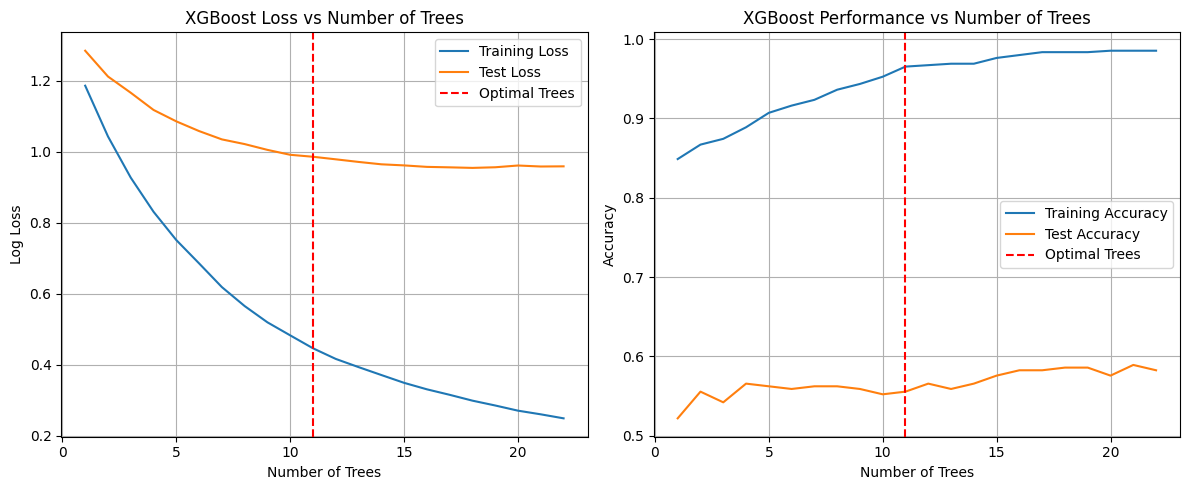

In [109]:
plt.figure(figsize=(12, 5))

eval_results = {}
bst = xgb.train(
    {**params, 'learning_rate': best_params['learning_rate'], 'max_depth': best_params['max_depth']},
    dtrain,
    num_boost_round=best_params['n_estimators'] * 2,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    evals_result=eval_results,
    verbose_eval=False
)
plt.subplot(1, 2, 1)
if 'mlogloss' in eval_results['train']:
    plt.plot(range(1, len(eval_results['train']['mlogloss'])+1), eval_results['train']['mlogloss'], label='Training Loss')
    plt.plot(range(1, len(eval_results['test']['mlogloss'])+1), eval_results['test']['mlogloss'], label='Test Loss')
    plt.axvline(x=best_params['n_estimators'], color='r', linestyle='--', label='Optimal Trees')
    plt.xlabel('Number of Trees')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Loss vs Number of Trees')
    plt.legend()
    plt.grid(True)

plt.subplot(1, 2, 2)
error_metric = 'merror' if 'merror' in eval_results['train'] else 'mlogloss'
if error_metric == 'merror':
    plt.plot(range(1, len(eval_results['train'][error_metric])+1), 1-np.array(eval_results['train'][error_metric]), label='Training Accuracy')
    plt.plot(range(1, len(eval_results['test'][error_metric])+1), 1-np.array(eval_results['test'][error_metric]), label='Test Accuracy')
    plt.ylabel('Accuracy')
else:
    plt.plot(range(1, len(eval_results['train'][error_metric])+1), eval_results['train'][error_metric], label='Training Loss')
    plt.plot(range(1, len(eval_results['test'][error_metric])+1), eval_results['test'][error_metric], label='Test Loss')
    plt.ylabel('Loss')

plt.axvline(x=best_params['n_estimators'], color='r', linestyle='--', label='Optimal Trees')
plt.xlabel('Number of Trees')
plt.title('XGBoost Performance vs Number of Trees')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



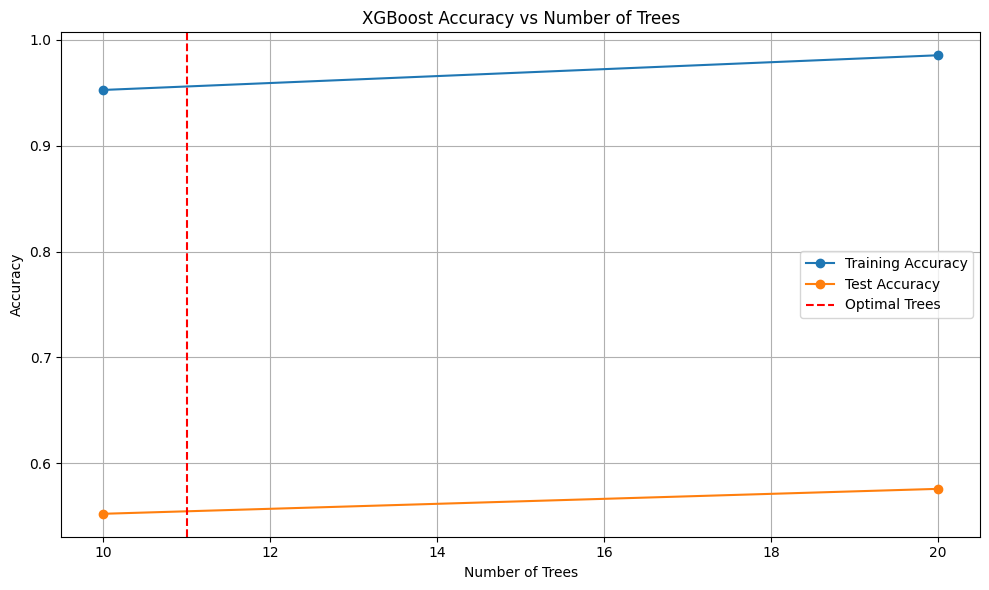

In [112]:
tree_counts = range(10, best_params['n_estimators']*2+1, 10)
train_accuracies = []
test_accuracies = []

for n_trees in tree_counts:

    model = xgb.train(
        {**params, 'learning_rate': best_params['learning_rate'], 'max_depth': best_params['max_depth']},
        dtrain,
        num_boost_round=n_trees
    )
    train_preds = model.predict(dtrain).astype(int)
    test_preds = model.predict(dtest).astype(int)
    train_acc = accuracy_score(y_train_num, train_preds)
    test_acc = accuracy_score(y_test_num, test_preds)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(tree_counts, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(tree_counts, test_accuracies, 'o-', label='Test Accuracy')
plt.axvline(x=best_params['n_estimators'], color='r', linestyle='--', label='Optimal Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs Number of Trees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ans
The optimal number of trees is 11

During the cross validation process where the model  performance on validation data stopped improving significantly after this point.

this is i think trade off between model complexity and generalization